# Data analysis

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

In [9]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data.keys())
print(parameter_values)

ANNEALING
ANNEALING_MID
ANNEALING_SLOPE
BG_NOISE
LEARNING_RATE_HL
LEARNING_RATE_RL
N_BG_CLUSTERS
N_DISTRACTORS
plots
RA_NOISE
RA_SIG_SLOPE
REWARD_WINDOW
TARGET_WIDTH
WEIGHT_JUMP
dict_keys(['ANNEALING', 'ANNEALING_MID', 'ANNEALING_SLOPE', 'BG_NOISE', 'LEARNING_RATE_HL', 'LEARNING_RATE_RL', 'N_BG_CLUSTERS', 'N_DISTRACTORS', 'RA_NOISE', 'RA_SIG_SLOPE', 'REWARD_WINDOW', 'TARGET_WIDTH', 'WEIGHT_JUMP'])
{'ANNEALING': array([0., 1.]), 'ANNEALING_MID': array([1., 2., 3., 4.]), 'ANNEALING_SLOPE': array([1., 2., 3., 4., 5., 6.]), 'BG_NOISE': array([0.05, 0.1 , 0.2 , 0.3 , 0.5 ]), 'LEARNING_RATE_HL': array([1.e-04, 0.e+00, 1.e-05, 2.e-05, 5.e-05]), 'LEARNING_RATE_RL': array([0.01, 0.05, 0.1 , 0.2 , 0.4 ]), 'N_BG_CLUSTERS': array([10.,  2.]), 'N_DISTRACTORS': array([10., 20.,  5., 50.]), 'RA_NOISE': array([0.01, 0.02, 0.05, 0.1 , 0.  ]), 'RA_SIG_SLOPE': array([18.,  9.]), 'REWARD_WINDOW': array([10., 25.,  5., 50.]), 'TARGET_WIDTH': array([0.1, 0.2, 0.3, 0.5, 0.7]), 'WEIGHT_JUMP': array([0., 1.])}

In [10]:
parameter_values['ANNEALING'] 
data['ANNEALING']

array([[0.50143668, 0.30999788]])

In [11]:
wanted_directories = ["WEIGHT_JUMP"]

2


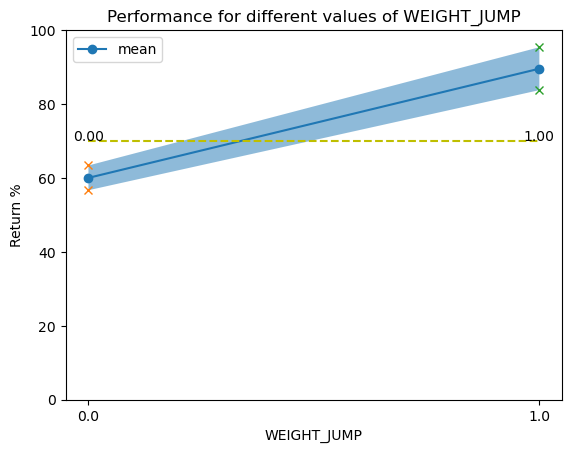

In [12]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in data.keys():
        if directory in wanted_directories:
            param = directory
            returns = 100*data[directory]
            n_values = len(parameter_values[directory])
            print(n_values)
            above_threshold = np.zeros(n_values)
            for i in range(n_values):
                above_threshold[i] = np.sum(returns[:,i] > 70)
            above_threshold /= returns.shape[0]
            plt.figure()
            means = np.mean(returns, axis=0)
            std = np.std(returns, axis=0)
            plt.plot(means, label='mean', marker='o')
            plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
            for i in range(n_values):
                plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
            plt.ylim(0, 100)
            for i in range(n_values):
                plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
            plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
            plt.xticks(np.arange(n_values, step=1), labels = parameter_values[directory])
            plt.title(f'Performance for different values of {param}')
            plt.xlabel(param)
            plt.ylabel('Return %')
            plt.legend()
            plt.show()


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

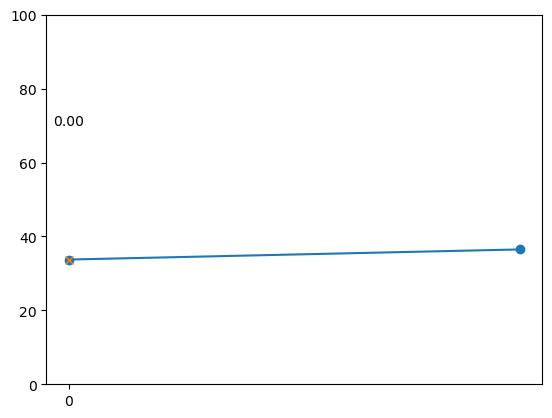

In [13]:
directory = 'RA_SIG_SLOPE'
param = directory
returns = 100*data[directory]
n_values = min(returns.shape)
above_threshold = np.zeros(n_values)
for i in range(n_values):
    above_threshold[i] = np.sum(returns[:,i] > 70)
above_threshold /= returns.shape[0]
plt.figure()
means = np.mean(returns, axis=0)
std = np.std(returns, axis=0)
plt.plot(means, label='mean', marker='o')
plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
for i in range(n_values):
    plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
plt.ylim(0, 100)
for i in range(n_values):
    plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
plt.xticks(np.arange(n_values, step=1), labels = parameter_names[param])
plt.title(f'Performance for different values of {param}')
plt.xlabel(param)
plt.ylabel('Return %')
plt.legend()
plt.show()